Clothing_Categorization

Parker Williamson
1/22/2018

This program takes a set of training data and classification data and using different methods of computer vision categorizes the test set based on the training set. The data that was used to analyze different techniques was clothing data from https://www.kaggle.com/zalando-research/fashionmnist.

(used https://www.youtube.com/watch?list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&time_continue=1493&v=mynJtLhhcXk as a template for CNN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import tensorflow as tf
from numpy import genfromtxt
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from scipy import stats

In [2]:
%matplotlib inline

Dictionary definitions shows the true categories that the dataset lists

In [3]:
definitions = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

open data from the adjacent rawData folder

In [4]:
train_data = genfromtxt('rawData/fashion-mnist_train.csv', skip_header=True, delimiter=',')

In [5]:
test_data = genfromtxt('rawData/fashion-mnist_test.csv', skip_header=True, delimiter=',')

In [6]:
classification,rawData =np.split(train_data,indices_or_sections=[1],axis=1)

Select preprocessing mode

In [7]:
mode=''

In [8]:
if mode=='Normalize':
    preclassifier_data = preprocessing.normalize(rawData)
elif mode=='Standardize':
    preclassifier_data = (rawData - np.mean(rawData, axis=1, keepdims=1)) / np.std(rawData, axis=1, keepdims=1)
else:
    preclassifier_data = rawData

Select classifer that is desired

In [9]:
classifier= 'LinReg'

In [39]:
print('classifier: {}'.format(classifier))
if classifier=='MLP':
    clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(784, 100, 100), random_state=1)
    clf.fit(preclassifier_data, classification.ravel())
#SVC should be run with mode=='Normalize'
elif classifier=='SVC':
    clf = svm.LinearSVC()
    clf.fit(preclassifier_data, classification.ravel())
elif classifier=='LinReg':
    clf = LogisticRegression()
    clf.fit(preclassifier_data, classification.ravel())

classifier: LinReg


In [10]:
classification_test,rawData_test =np.split(test_data,indices_or_sections=[1],axis=1)

In [11]:
if mode=='Normalize':
    preclassifier_data_test = preprocessing.normalize(rawData_test)
elif mode=='Standardize':
    preclassifier_data_test = (rawData_test - np.mean(rawData_test, axis=1, keepdims=1)) / np.std(rawData_test, axis=1, keepdims=1)
else:
    preclassifier_data_test = rawData_test

In [42]:
results = clf.predict(preclassifier_data_test)

In [43]:
print(results)
print(len(results))
print(len(classification_test))

[ 0.  1.  2. ...,  8.  6.  2.]
10000
10000


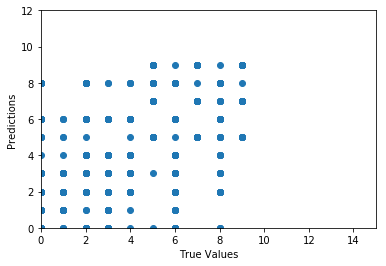

In [44]:
## The line / model
#%pylab inline
plt.scatter(classification_test, results)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis([0, 15, 0, 12])
plt.show()

In [45]:
comp= np.equal(list(classification_test.ravel()), list(results))
#print(comp.shape)
#print(classification_test.ravel())
#print(results)
print(comp)
print(comp.sum())
print('Percentage: {}'.format(100*(comp.sum()/(len(comp)))))

[ True  True  True ...,  True False False]
8445
Percentage: 84.45


Convolutional Neural Network below

In [14]:
#https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
#(x_train y_train), (x_test, y_test) = mnist.load_data()
x_train = preclassifier_data
y_train = classification.ravel()
x_test = preclassifier_data_test
y_test = classification_test.ravel()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using Theano backend.



You can find the C code in this temporary file: C:\Users\Parker\AppData\Local\Temp\theano_compilation_error_2gwcx8wd


AttributeError: module 'theano' has no attribute 'gof'

In [6]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [24]:
print(np.shape(preclassifier_data))
print(np.shape(answers))
print(np.shape(preclassifier_data_test))
print(np.shape(answers_test))

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)
